<a href="https://colab.research.google.com/github/NoeMelo/DataMiningModels/blob/master/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RandomForest

In [1]:
import pandas as pd
import numpy as np

In [9]:
#Levantar Dataset desde Drive con Colab
#--------------------------------------------------#
#from google.colab import drive 
#drive.mount('/content/gdrive')
#file = "/content/gdrive/My Drive/Colab Notebooks/DCredit.xlsx"
#--------------------------------------------------#
#Desde escritorio con Colab
#--------------------------------------------------#
#from google.colab import files
#uploaded = files.upload()

**TRAIN**

In [7]:
file = "../Dataset/DCredit.xlsx"
credit_train = pd.read_excel(file, sheet_name="Train")
credit_train.head()

id checking_balance  months_loan_duration credit_history  \
0  288       1 - 200 DM                    48           poor   
1  788          unknown                    48       critical   
2  409          unknown                    24           good   
3  881          unknown                    24           good   
4  937         > 200 DM                     9           good   

                purpose  amount savings_balance employment_duration  \
0                  car0    7582    100 - 500 DM          unemployed   
1                   car    2751         unknown           > 7 years   
2  furniture/appliances    3235   500 - 1000 DM           > 7 years   
3                   car    7814        < 100 DM         4 - 7 years   
4  furniture/appliances     745        < 100 DM         1 - 4 years   

   percent_of_income  years_at_residence  age other_credit housing  \
0                  2                   4   31         none   other   
1                  4                   3   38         none     own   
2                  3                   2   26         none     own   
3                  3                   3   38         none     own   
4                  3                   2   28         none     own   

   existing_loans_count         job  dependents phone default  
0                     1  management           1   yes      no  
1                     2     skilled           2   yes      no  
2                     1  management           1   yes      no  
3                     1  management           1   yes      no  
4                     1   unskilled           1    no     yes

In [4]:
credit_train.shape

(800, 18)

In [5]:
credit_train.describe()

id  months_loan_duration        amount  percent_of_income  \
count   800.000000            800.000000    800.000000         800.000000   
mean    492.016250             21.116250   3264.193750           2.968750   
std     292.654595             12.388486   2845.376591           1.124435   
min       1.000000              4.000000    250.000000           1.000000   
25%     235.750000             12.000000   1363.250000           2.000000   
50%     483.500000             18.000000   2278.500000           3.000000   
75%     748.250000             24.000000   3973.750000           4.000000   
max    1000.000000             72.000000  18424.000000           4.000000   

       years_at_residence         age  existing_loans_count  dependents  
count          800.000000  800.000000            800.000000  800.000000  
mean             2.823750   35.672500              1.408750    1.153750  
std              1.101909   11.451929              0.578439    0.360935  
min              1.000000   19.000000              1.000000    1.000000  
25%              2.000000   27.000000              1.000000    1.000000  
50%              3.000000   33.000000              1.000000    1.000000  
75%              4.000000   42.000000              2.000000    1.000000  
max              4.000000   75.000000              4.000000    2.000000

In [6]:
credit_train.groupby(["default"]).size()

default
no     562
yes    238
dtype: int64

In [7]:
pd.value_counts(credit_train['default'])

no     562
yes    238
Name: default, dtype: int64

In [0]:
%matplotlib inline 
import matplotlib.pyplot as plt

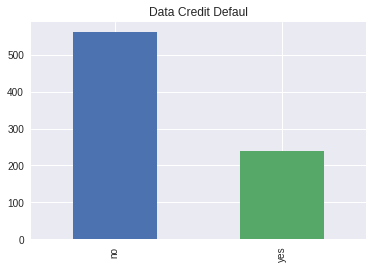

In [9]:
credit_train['default'].value_counts().plot(kind='bar', title= 'Data Credit Defaul')

In [10]:
X_train = credit_train.iloc[:,1:17] #separamos a los Xi del Y
X_train.head()

checking_balance  months_loan_duration credit_history               purpose  \
0       1 - 200 DM                    48           poor                  car0   
1          unknown                    48       critical                   car   
2          unknown                    24           good  furniture/appliances   
3          unknown                    24           good                   car   
4         > 200 DM                     9           good  furniture/appliances   

   amount savings_balance employment_duration  percent_of_income  \
0    7582    100 - 500 DM          unemployed                  2   
1    2751         unknown           > 7 years                  4   
2    3235   500 - 1000 DM           > 7 years                  3   
3    7814        < 100 DM         4 - 7 years                  3   
4     745        < 100 DM         1 - 4 years                  3   

   years_at_residence  age other_credit housing  existing_loans_count  \
0                   4   31         none   other                     1   
1                   3   38         none     own                     2   
2                   2   26         none     own                     1   
3                   3   38         none     own                     1   
4                   2   28         none     own                     1   

          job  dependents phone  
0  management           1   yes  
1     skilled           2   yes  
2  management           1   yes  
3  management           1   yes  
4   unskilled           1    no

In [11]:
X_train.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
dtype: object

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
lb_make = LabelEncoder()
X_train["checking_balance"] = lb_make.fit_transform(X_train["checking_balance"])
X_train["credit_history"] = lb_make.fit_transform(X_train["credit_history"])
X_train["purpose"] = lb_make.fit_transform(X_train["purpose"])
X_train["savings_balance"] = lb_make.fit_transform(X_train["savings_balance"])
X_train["employment_duration"] = lb_make.fit_transform(X_train["employment_duration"])
X_train["other_credit"] = lb_make.fit_transform(X_train["other_credit"])
X_train["housing"] = lb_make.fit_transform(X_train["housing"])
X_train["job"] = lb_make.fit_transform(X_train["job"])
X_train["phone"] = lb_make.fit_transform(X_train["phone"])

In [15]:
X_train.head()

checking_balance  months_loan_duration  credit_history  purpose  amount  \
0                 0                    48               3        2    7582   
1                 3                    48               0        1    2751   
2                 3                    24               1        4    3235   
3                 3                    24               1        1    7814   
4                 2                     9               1        4     745   

   savings_balance  employment_duration  percent_of_income  \
0                0                    4                  2   
1                4                    3                  4   
2                1                    3                  3   
3                2                    1                  3   
4                2                    0                  3   

   years_at_residence  age  other_credit  housing  existing_loans_count  job  \
0                   4   31             1        0                     1    0   
1                   3   38             1        1                     2    1   
2                   2   26             1        1                     1    0   
3                   3   38             1        1                     1    0   
4                   2   28             1        1                     1    3   

   dependents  phone  
0           1      1  
1           2      1  
2           1      1  
3           1      1  
4           1      0

In [17]:
credit_train.groupby(["checking_balance"]).size()

checking_balance
1 - 200 DM    222
< 0 DM        209
> 200 DM       53
unknown       316
dtype: int64

In [19]:
X_train.groupby(["checking_balance"]).size()

checking_balance
0    222
1    209
2     53
3    316
dtype: int64

In [20]:
y_train = credit_train.default
y_train.head()

0     no
1     no
2     no
3     no
4    yes
Name: default, dtype: object

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
clf = RandomForestClassifier(n_estimators=10, criterion='gini',max_depth=10,max_features='auto')
clf = clf.fit(X_train, y_train)

In [0]:
from sklearn.metrics import accuracy_score

In [24]:
pred_rf = clf.predict(X_train)
accuracy_score(y_train, pred_rf)

0.9625

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set(style="ticks", color_codes=True)

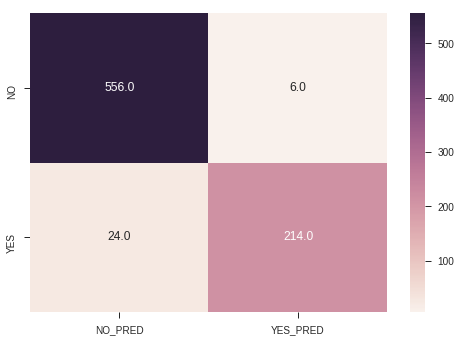

In [26]:
conf = confusion_matrix(y_train, pred_rf, labels = ["no","yes"])
label_y = ['NO','YES']
label_x = ['NO_PRED', 'YES_PRED']
sns.heatmap(conf, annot=True, xticklabels=label_x, yticklabels=label_y,fmt=".1f")

In [27]:
importance = pd.DataFrame()
importance['variable'] = X_train.columns
importance['importance'] = clf.feature_importances_
importance_ordered = importance.sort_values(by="importance",ascending = False)
importance_ordered

variable  importance
4                 amount    0.173039
0       checking_balance    0.123987
9                    age    0.118652
1   months_loan_duration    0.094489
2         credit_history    0.076422
7      percent_of_income    0.055919
6    employment_duration    0.053973
8     years_at_residence    0.050883
3                purpose    0.048387
5        savings_balance    0.046336
10          other_credit    0.038958
11               housing    0.031365
13                   job    0.027848
12  existing_loans_count    0.023629
15                 phone    0.022629
14            dependents    0.013483

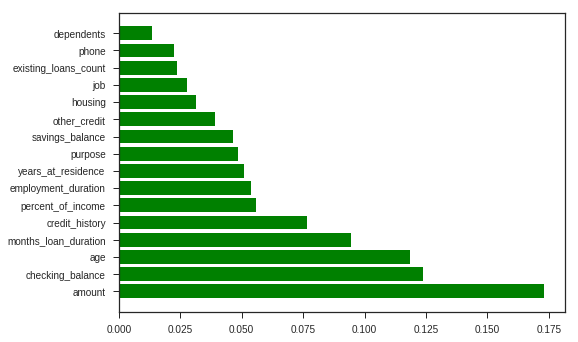

In [28]:
plt.barh(importance_ordered['variable'],importance_ordered['importance'], color = 'green')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


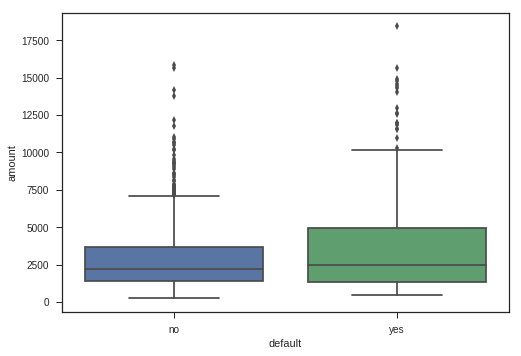

In [29]:
sns.boxplot(x ="default", y ="amount", data = credit_train)

**TUNNIG**

In [0]:
#from sklearn.model_selection import GridSearchCV

#%%time
#rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt', oob_score = True) 
 
# Use a grid over parameters of interest
#param_grid = { 
#           "n_estimators" : [9, 18, 27, 36, 45, 54, 63],
#           "max_depth" : [1, 5, 10, 15, 20, 25, 30],
#           "min_samples_leaf" : [1, 2, 4, 6, 8, 10]}
 
#CV_rfc = GridSearchCV(estimator=rfc, param_grid= param_grid, cv= 10)
#CV_rfc.fit(X_train, y_train)

**TEST**

In [8]:
file_test = "../Dataset/DCredit.xlsx"
credit_test = pd.read_excel(file_test, sheet_name="Test")
credit_test.head()

id checking_balance  months_loan_duration credit_history  \
0   3          unknown                    12       critical   
1  10       1 - 200 DM                    30       critical   
2  11       1 - 200 DM                    12           good   
3  14           < 0 DM                    24       critical   
4  27          unknown                     6        perfect   

                purpose  amount savings_balance employment_duration  \
0             education    2096        < 100 DM         4 - 7 years   
1                   car    5234        < 100 DM          unemployed   
2                   car    1295        < 100 DM            < 1 year   
3                   car    1199        < 100 DM           > 7 years   
4  furniture/appliances     426        < 100 DM           > 7 years   

   percent_of_income  years_at_residence  age other_credit housing  \
0                  2                   3   49         none     own   
1                  4                   2   28         none     own   
2                  3                   1   25         none    rent   
3                  4                   4   60         none     own   
4                  4                   4   39         none     own   

   existing_loans_count         job  dependents phone default  
0                     1   unskilled           2    no      no  
1                     2  management           1    no     yes  
2                     1     skilled           1    no     yes  
3                     2   unskilled           1    no     yes  
4                     1   unskilled           1    no      no

In [32]:
credit_test.shape

(200, 18)

In [33]:
credit_test.groupby(["default"]).size()

default
no     138
yes     62
dtype: int64

In [34]:
X_test = credit_test.iloc[:,1:-1] # quitamos el ID y el Y, primero y Ãºltimo iloc https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
X_test.head()

checking_balance  months_loan_duration credit_history               purpose  \
0          unknown                    12       critical             education   
1       1 - 200 DM                    30       critical                   car   
2       1 - 200 DM                    12           good                   car   
3           < 0 DM                    24       critical                   car   
4          unknown                     6        perfect  furniture/appliances   

   amount savings_balance employment_duration  percent_of_income  \
0    2096        < 100 DM         4 - 7 years                  2   
1    5234        < 100 DM          unemployed                  4   
2    1295        < 100 DM            < 1 year                  3   
3    1199        < 100 DM           > 7 years                  4   
4     426        < 100 DM           > 7 years                  4   

   years_at_residence  age other_credit housing  existing_loans_count  \
0                   3   49         none     own                     1   
1                   2   28         none     own                     2   
2                   1   25         none    rent                     1   
3                   4   60         none     own                     2   
4                   4   39         none     own                     1   

          job  dependents phone  
0   unskilled           2    no  
1  management           1    no  
2     skilled           1    no  
3   unskilled           1    no  
4   unskilled           1    no

In [0]:
lb_make = LabelEncoder()
X_test["checking_balance"] = lb_make.fit_transform(X_test["checking_balance"])
X_test["credit_history"] = lb_make.fit_transform(X_test["credit_history"])
X_test["purpose"] = lb_make.fit_transform(X_test["purpose"])
X_test["savings_balance"] = lb_make.fit_transform(X_test["savings_balance"])
X_test["employment_duration"] = lb_make.fit_transform(X_test["employment_duration"])
X_test["other_credit"] = lb_make.fit_transform(X_test["other_credit"])
X_test["housing"] = lb_make.fit_transform(X_test["housing"])
X_test["job"] = lb_make.fit_transform(X_test["job"])
X_test["phone"] = lb_make.fit_transform(X_test["phone"])

In [36]:
X_test.head()

checking_balance  months_loan_duration  credit_history  purpose  amount  \
0                 3                    12               0        3    2096   
1                 0                    30               0        1    5234   
2                 0                    12               1        1    1295   
3                 1                    24               0        1    1199   
4                 3                     6               2        4     426   

   savings_balance  employment_duration  percent_of_income  \
0                2                    1                  2   
1                2                    4                  4   
2                2                    2                  3   
3                2                    3                  4   
4                2                    3                  4   

   years_at_residence  age  other_credit  housing  existing_loans_count  job  \
0                   3   49             1        1                     1    3   
1                   2   28             1        1                     2    0   
2                   1   25             1        2                     1    1   
3                   4   60             1        1                     2    3   
4                   4   39             1        1                     1    3   

   dependents  phone  
0           2      0  
1           1      0  
2           1      0  
3           1      0  
4           1      0

In [37]:
X_test.groupby(["checking_balance"]).size()

checking_balance
0    47
1    65
2    10
3    78
dtype: int64

In [38]:
y_test = credit_test.default
y_test.head()

0     no
1    yes
2    yes
3    yes
4     no
Name: default, dtype: object

In [39]:
pred_rf_test = clf.predict(X_test)
accuracy_score(y_test, pred_rf_test)

0.75

In [40]:
pred_rf_test_prob = clf.predict_proba(X_test)
pred_rf_test_prob[0:10]

array([[0.9781746 , 0.0218254 ],
       [0.39210526, 0.60789474],
       [0.38231985, 0.61768015],
       [0.79829932, 0.20170068],
       [0.47831933, 0.52168067],
       [0.60827586, 0.39172414],
       [0.24722222, 0.75277778],
       [0.59652733, 0.40347267],
       [0.80120822, 0.19879178],
       [0.82372929, 0.17627071]])

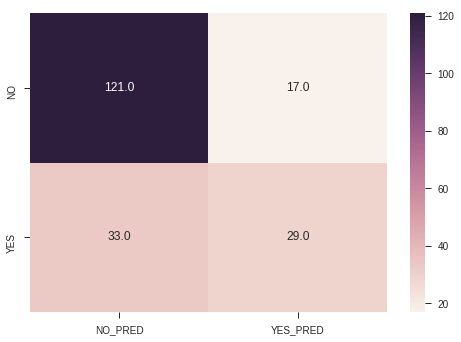

In [41]:
conf = confusion_matrix(y_test, pred_rf_test, labels = ["no","yes"])
label_y = ['NO','YES']
label_x = ['NO_PRED', 'YES_PRED']
sns.heatmap(conf, annot=True, xticklabels=label_x, yticklabels=label_y,fmt=".1f")